In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data (1).csv to Company_Data (1) (1).csv


In [3]:
df=pd.read_csv('Company_Data (1).csv')

In [4]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


In [6]:
df["ShelveLoc"]=label_encoder.fit_transform(df["ShelveLoc"])
df["Urban"]=label_encoder.fit_transform(df["Urban"])
df["US"]=label_encoder.fit_transform(df["US"])

In [7]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


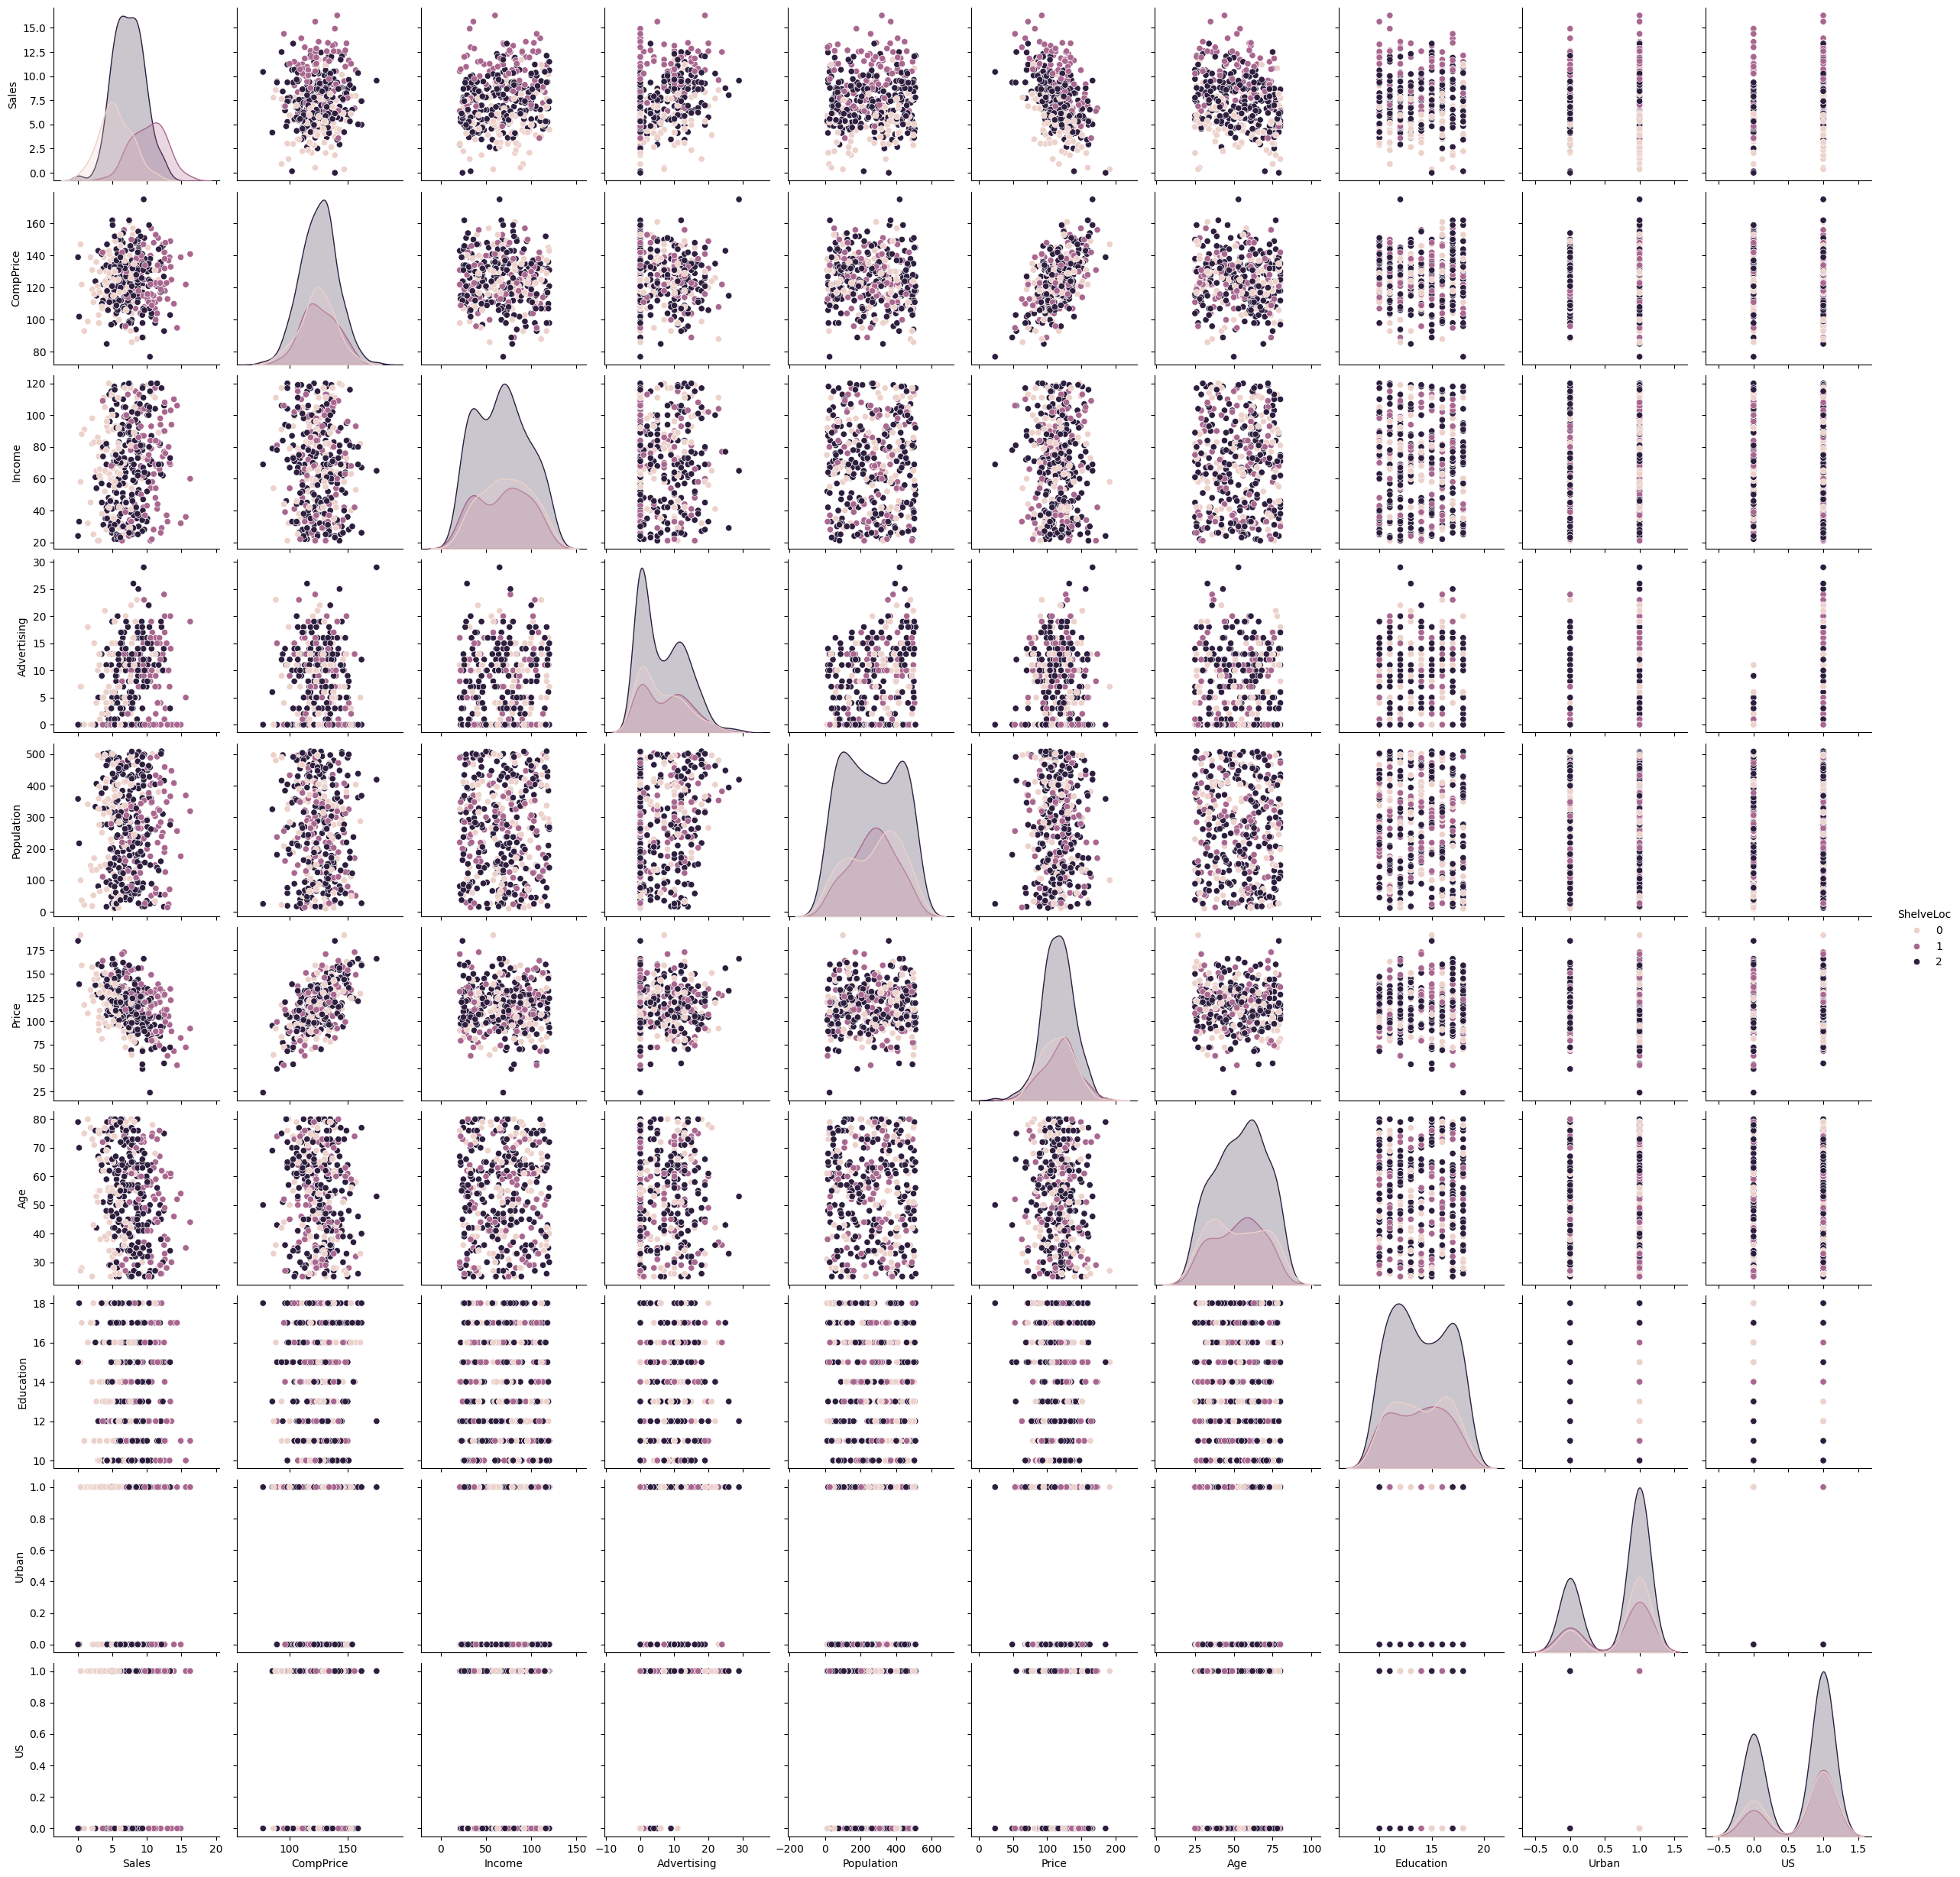

In [8]:
sns.pairplot(data=df, hue = 'ShelveLoc')

In [11]:
x=df.iloc[:,0:6]
y=df.iloc[:,6]

In [13]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [14]:
df['ShelveLoc'].unique()

array([0, 1, 2])

In [15]:
df.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [16]:
col = list(df.columns)
col

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [18]:
from sklearn import tree

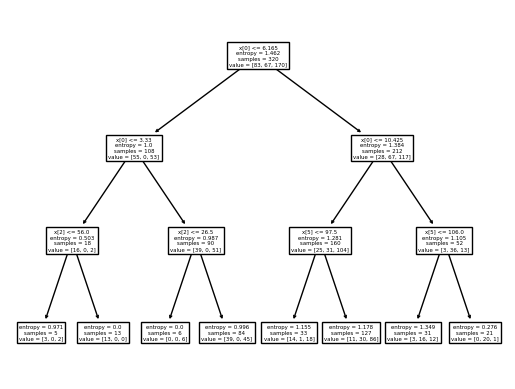

In [19]:
tree.plot_tree(model);

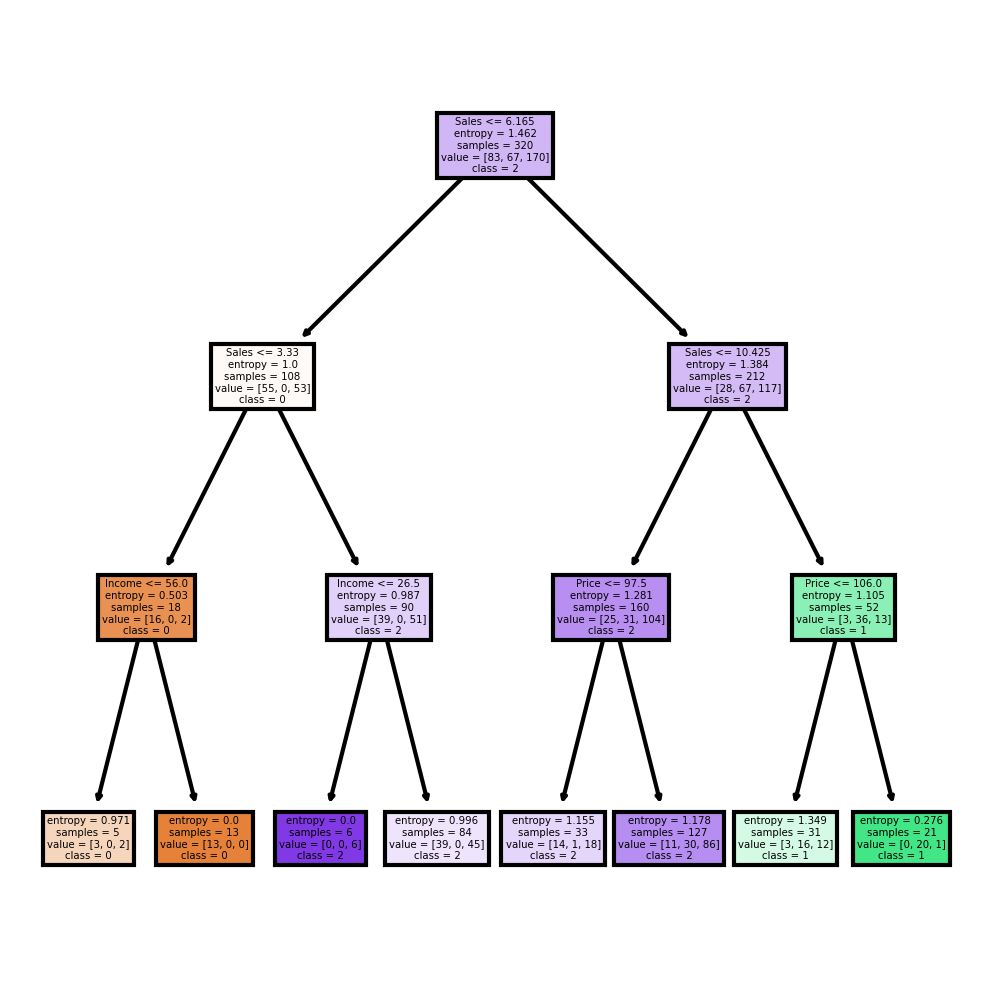

In [20]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['0', '1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [21]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

2    63
1    13
0     4
dtype: int64

In [22]:
pd.crosstab(y_test,preds)

col_0,0,1,2
ShelveLoc,,,
0,1,0,12
1,0,8,10
2,3,5,41


In [23]:
np.mean(preds==y_test)

0.625

GINI CRITERIA

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [25]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.625

DECISION TREE REGRESSOR

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
X = df.iloc[:,0:6]
y = df.iloc[:,6]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [30]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
model.score(X_test,y_test)

-1.0849986909852518